Copyright 2020 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Random forests: Problem solving

In this session, we'll use the `boston` dataset, which has been used to examine the relationship between assorted variables and house prices:


| Variable | Type | Description |
|:----|:-----|:----------|
|crim | Ratio | per capita crime rate by town | 
|zn | Ratio | proportion of residential land zoned for lots over 25,000 sq. ft. | 
|indus | Ratio | proportion of non-retain business acres per town | 
|chas | Nominal (binary) | Charles River dummy variable (=1 if tract bounds river, =0 otherwise) | 
|nox | Ratio | nitrogen oxides concentration (parts per 10 million) | 
|rm | Ratio | average number of rooms per dwelling | 
|age | Ratio | proportion of owner-occupied units built prior to 1940 | 
|dis | Ratio | weighted mean of distances to fie Boston employment centers | 
|rad | Ordinal | index of accessibility to radial highways | 
|tax | Ratio | full-value proporty tax rate per \$10,000 | 
|ptratio | Ratio | pupil-teacher ratio by town | 
|lstat | Ratio | percent lower status of population (defined as non-high school graduate, manual labor) | 
|medv | Ratio | median value of owner-occupied homes in $1000s | 

<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
</div>
<br>
    
As before, we'll try to predict `medv` using the rest of the variables.

**Because `medv` is a ratio variable, we will do random forest regression trees not decision trees.**

Additionally, we will compare the performance of three models on this problem:

- Regression trees
- Bagged regression trees
- Random forest regression trees

## Load data

Import `pandas` to load a dataframe.

In [2]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="importAs" id="/k@:}OLWtAh)hpx[.2^]" x="150" y="308"><field name="libraryName">pandas</field><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field></block></xml>

Load the dataframe.

In [4]:
dataframe = pd.read_csv('datasets/boston.csv')

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="variables_set" id="FJGldw(qFp?V=E]uaN)4" x="42" y="64"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="VALUE"><block type="varDoMethod" id="4s18v%0iqE%_l@{fLYCo"><mutation items="1"></mutation><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="tN4Jmaffy/={ZFo;uu;W"><field name="TEXT">datasets/boston.csv</field></block></value></block></value></block><block type="variables_get" id="kd_[EnCEx6O}:gck{;r5" x="46" y="162"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field></block></xml>

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


## Explore data

Some of these steps we've done before with these data, so we'll skip the normal interpretation steps on those parts.

Describe the data.

In [6]:
dataframe.describe()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="varDoMethod" id="-[lX-}4sT`|#7E(Sti)^" x="8" y="188"><mutation items="1"></mutation><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">describe</field><data>dataframe:describe</data></block></xml>

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Make a correlation heatmap.

First import `plotly.express`.

In [8]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="importAs" id="JKd}DIrGfV*IelKZ!4ls" x="129" y="219"><field name="libraryName">plotly.express</field><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field></block></xml>

Create a correlation matrix.

In [10]:
corr = dataframe.corr()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Km/Jt%8YE.[}?9^E?9N;">corr</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="variables_set" id="/i824a)~PM!?y(vR5o.7" x="88" y="75"><field name="VAR" id="Km/Jt%8YE.[}?9^E?9N;">corr</field><value name="VALUE"><block type="varDoMethod" id="W{%v1dBEDnD_:orevoPY"><mutation items="1"></mutation><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">corr</field><data>dataframe:corr</data></block></value></block></xml>

And show the correlation heatmap with row/column labels.

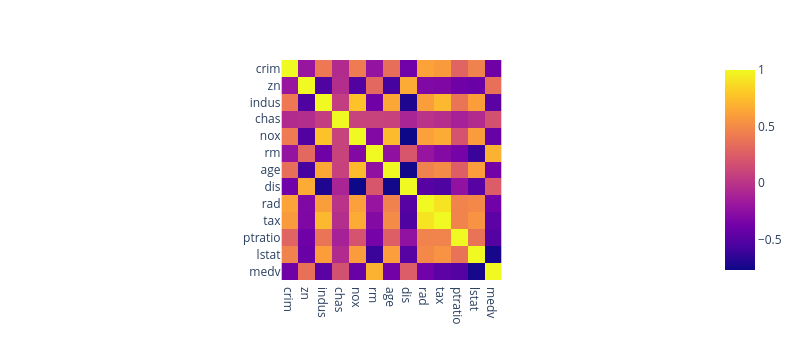

In [12]:
px.imshow(corr,x= (corr.columns),y= (corr.columns))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="Km/Jt%8YE.[}?9^E?9N;">corr</variable></variables><block type="varDoMethod" id="7PkTI5@+A6#C}J7CTmyF" x="0" y="0"><mutation items="3"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">imshow</field><data>px:imshow</data><value name="ADD0"><block type="variables_get" id=":;^8]9y7jv$I.u56eu+w"><field name="VAR" id="Km/Jt%8YE.[}?9^E?9N;">corr</field></block></value><value name="ADD1"><block type="valueOutputCodeBlock" id="azE.sa4Vaf3Tqnxg+Wj$"><field name="CODE">x=</field><value name="INPUT"><block type="varGetProperty" id=",Xr0Xc;@G;@aMs+upu)L"><field name="VAR" id="Km/Jt%8YE.[}?9^E?9N;">corr</field><field name="MEMBER">columns</field><data>corr:columns</data></block></value></block></value><value name="ADD2"><block type="valueOutputCodeBlock" id="OG/hi7jGihv_4MF;pM(i"><field name="CODE">y=</field><value name="INPUT"><block type="varGetProperty" id=".$GSSp$+O[)pLmOP[sk@"><field name="VAR" id="Km/Jt%8YE.[}?9^E?9N;">corr</field><field name="MEMBER">columns</field><data>corr:columns</data></block></value></block></value></block></xml>

Because these variables are highly correlated (an numeric), a scatterplot matrix would make a lot of sense.

Use `plotly` to make a `scatter_matrix` of the dataframe.
If you have a hard time reading the labels, you can give it something like `width=1000` and `height=1000` to make it bigger.

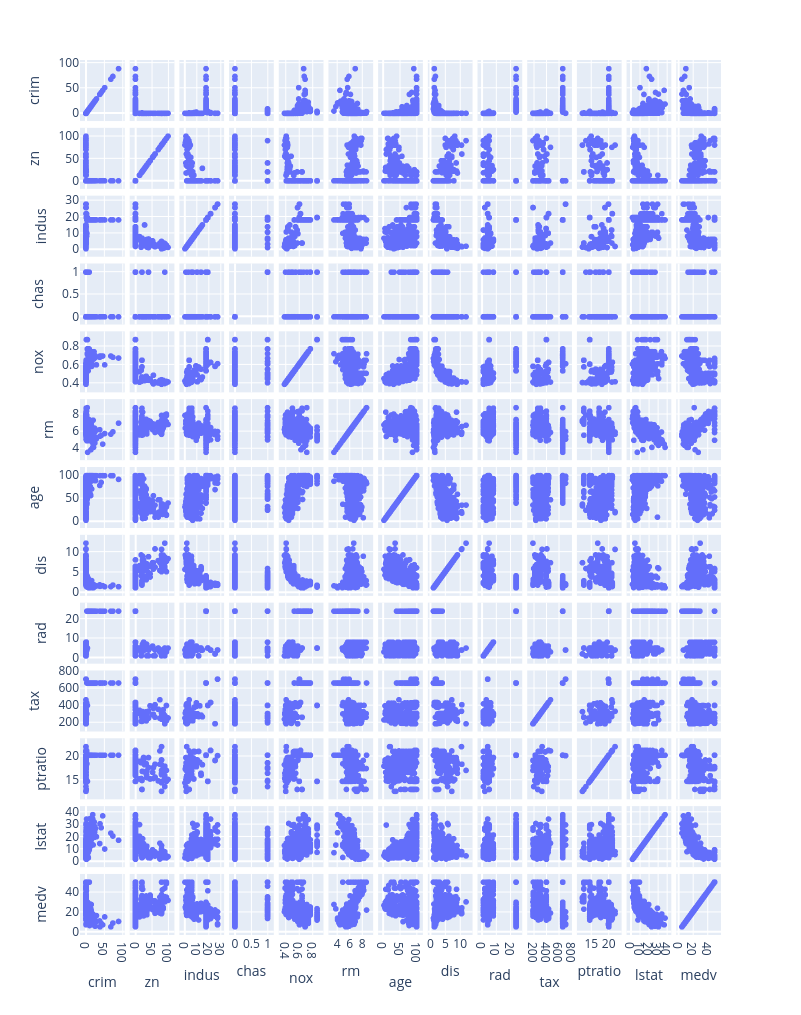

In [14]:
px.scatter_matrix(dataframe,height=1000,width=1000)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="varDoMethod" id="K_Y0K-1=:jF)7/~qEX=/" x="0" y="0"><mutation items="3"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">scatter_matrix</field><data>px:scatter_matrix</data><value name="ADD0"><block type="variables_get" id="%h3}=^{z3cVOb@/:fg6J"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="]Npu=MiIi:j@dVoiGHgt"><field name="CODE">height=1000</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="8n!ZYE^-6}84#rqNVNl/"><field name="CODE">width=1000</field></block></value></block></xml>

-----------
**QUESTION:**

Remembering that a perfect correlation is a line, and no correlation is a uniform random scattering of datapoints, what would you say about the pattern of these scatterplots overall?
Of the scatterplots in the last row (i.e. correlated with `medv`) in particular?

**ANSWER: (click here to edit)**

*There is a huge variety in relationships.
Some are loosely linear with outliers, some are clearly nonlinear are curved.
Many are wedge shaped or triangular.
And many are "L" shaped, or smeared across two axes.
Overall, I would decribe many of these as mixtures of multiple patterns rather than single patterns.
Mixtures suggest complex relationships in the data.*
<hr>

Ultimately we want to predict median house value (`medv`), so make a histogram of that.

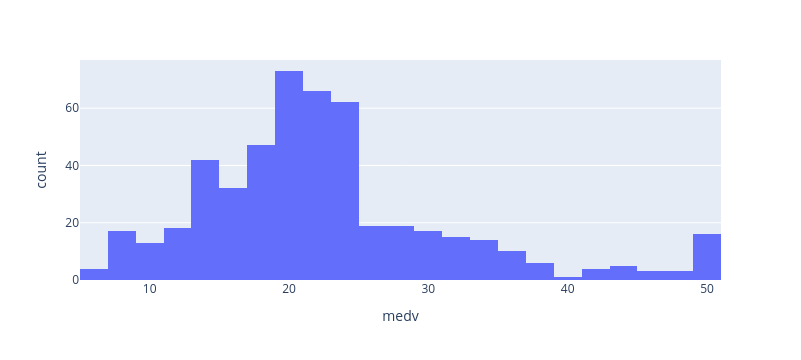

In [16]:
px.histogram(dataframe,x="medv")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="varDoMethod" id="#Tiud2f{UIkXM/h4;AmX" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="variables_get" id=")gY)bM`$Mtsdq-Pdit#N"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="PI-[,1QmMDguHkVLv_Sc"><field name="CODE">x="medv"</field></block></value></block></xml>

------------------
**QUESTION:**

Do you think we need to transform `medv` to make it more normal? Why or why not?

**ANSWER: (click here to edit)**

*It's pretty much bell shaped now, so I wouldn't.
However, I would note the spike at the high end of the scale.
Potentially those datapoints, as outliers, could skew model predictions in that direction.*
<hr>

## Prepare train/test sets

If we were just using bagging or random forests, we could use OOB performance instead of splitting the data into training and testing sets.

However, splitting is necessary if we want to compare to regression trees.

Start by dropping the response variable, `medv` to make a new dataframe called `X`.

Save a dataframe with just `medv` in `Y`. 

In [22]:
X = dataframe.drop(columns=["medv"])

Y = dataframe[['medv']]

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="variables_set" id="M9g^9:hbZQ0Cb9jKq9V6" x="64" y="111"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><value name="VALUE"><block type="varDoMethod" id="k7t38%eJz)@=B8{vW^(u"><mutation items="1"></mutation><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">drop</field><data>dataframe:drop</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="fk{P(H^@/_!^1+tw-Hi*"><field name="CODE">columns=["medv"]</field></block></value></block></value></block><block type="variables_set" id="AfS6+vO/i%7i^LvFLvFa" x="76" y="214"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field><value name="VALUE"><block type="indexer" id="TL#b!#{[zvX*;C.Hv/0I"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="INDEX"><block type="lists_create_with" id="x3z0}lY0DE*JB:y/OH|M"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="O2`:Q-pVIpQx2m6U6ly]"><field name="TEXT">medv</field></block></value></block></value></block></value></block></xml>

Import `sklearn.model_selection` to split the data into train/test sets.

In [24]:
import sklearn.model_selection as model_selection

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable></variables><block type="importAs" id="E{QJ$O@lc8u.;OTWdVgf" x="-89" y="168"><field name="libraryName">sklearn.model_selection</field><field name="VAR" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field></block></xml>

And do the actual split.

In [26]:
splits = model_selection.train_test_split(X,Y,random_state=1)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable></variables><block type="variables_set" id="HpD!.HSC`PPRg]21i*7c" x="26" y="81"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field><value name="VALUE"><block type="varDoMethod" id="fUetl3$Ak=SI~T6T5!6c"><mutation items="3"></mutation><field name="VAR" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field><field name="MEMBER">train_test_split</field><data>model_selection:train_test_split</data><value name="ADD0"><block type="variables_get" id="jN^;NIVaV%22*W_^|!uK"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></value><value name="ADD1"><block type="variables_get" id="OOZSj;YDm{T6q%{~5?B1"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="Gg*^%q4qIJwc*of,V|rb"><field name="CODE">random_state=1</field></block></value></block></value></block></xml>

## Fit models

Fit three models in turn:

- Regression tree
- Bagged regression tree
- Random forest regression tree

**We're going to get predictions from each of these models and then compare them.**

Import the `sklearn.tree` and `sklearn.ensemble` libraries.

In [41]:
import sklearn.tree as tree
import sklearn.ensemble as ensemble

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="tkeU~z;dQ]^6[?rbF?)9">tree</variable><variable id="YrOLY99XD^WJhuTK)IFx">ensemble</variable></variables><block type="importAs" id="B:2{AB~*s},^$L!3{LPk" x="69" y="73"><field name="libraryName">sklearn.tree</field><field name="VAR" id="tkeU~z;dQ]^6[?rbF?)9">tree</field><next><block type="importAs" id="aH_~S~W~@4D,8tXvn_s6"><field name="libraryName">sklearn.ensemble</field><field name="VAR" id="YrOLY99XD^WJhuTK)IFx">ensemble</field></block></next></block></xml>

### Regression tree

Create the regression tree model.
Go ahead and create it with a freestyle `random_state=1` so we all get the same results.

In [43]:
regressionTree = tree.DecisionTreeRegressor(random_state=1)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="dE3=o8T5`CCHo%,m,2(A">regressionTree</variable><variable id="tkeU~z;dQ]^6[?rbF?)9">tree</variable></variables><block type="variables_set" id="zW~dc)uX.9yIdvHf.vvz" x="1" y="178"><field name="VAR" id="dE3=o8T5`CCHo%,m,2(A">regressionTree</field><value name="VALUE"><block type="varCreateObject" id="0I6gCe=.wV.oI1[UHnIf"><mutation items="1"></mutation><field name="VAR" id="tkeU~z;dQ]^6[?rbF?)9">tree</field><field name="MEMBER">DecisionTreeRegressor</field><data>tree:DecisionTreeRegressor</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="!`-E%6XkL$v~(l2o|@vx"><field name="CODE">random_state=1</field></block></value></block></value></block></xml>

Fit the regression tree model and get predictions.

In [45]:
regressionTree.fit(splits[0],splits[2])

predictionsRegressionTree = regressionTree.predict(splits[1])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="dE3=o8T5`CCHo%,m,2(A">regressionTree</variable><variable id="v4b`=H5!0=v2ZUg#rwdc">predictionsRegressionTree</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="varDoMethod" id="-@fm,911cJiCu@jkys%R" x="15" y="36"><mutation items="2"></mutation><field name="VAR" id="dE3=o8T5`CCHo%,m,2(A">regressionTree</field><field name="MEMBER">fit</field><data>regressionTree:fit</data><value name="ADD0"><block type="lists_getIndex" id="W~.ZU([-)(,-i3=bTsB|"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="GIJn[jpD_~wa}#7IO!1K"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="Rh[;nrMLN$[cFFsZC~T|"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="YkCD57xF*SSN3[`_op{u"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="M@?wn}aoHxJYan0=AE3$"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="jNUa2BdXPG?H8|.br*@e"><field name="NUM">3</field></block></value></block></value></block><block type="variables_set" id="hYTHG6w/4_XrC:bR/Tg6" x="-12" y="253"><field name="VAR" id="v4b`=H5!0=v2ZUg#rwdc">predictionsRegressionTree</field><value name="VALUE"><block type="varDoMethod" id="6wcPa{b$~7!fP,(9Haqr"><mutation items="1"></mutation><field name="VAR" id="dE3=o8T5`CCHo%,m,2(A">regressionTree</field><field name="MEMBER">predict</field><data>regressionTree:predict</data><value name="ADD0"><block type="lists_getIndex" id="(b.Ja7F_dbv:extS3!R#"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="]z^sd:]CSl!6.?CCL.94"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="#`:Dto*gHNUBL~{WuQz?"><field name="NUM">2</field></block></value></block></value></block></value></block></xml>

### Bagged regression tree

Next create the bagged regression tree model by using `BaggingRegressor`.
Just as `BaggingClassifier` uses a decision tree by default, `BaggingRegressor` uses a regression tree by default.
Use the same parameters as the random forest notebook (e.g. 100 trees, etc).

In [47]:
baggedRegressionTree = ensemble.BaggingRegressor(n_estimators=100,max_samples=.3,oob_score=True,random_state=1)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="XuKv*{qNU92..^WV;EO*">baggedRegressionTree</variable><variable id="YrOLY99XD^WJhuTK)IFx">ensemble</variable></variables><block type="variables_set" id="Fyby#Z6`$J{8yxJ#gF-6" x="30" y="140"><field name="VAR" id="XuKv*{qNU92..^WV;EO*">baggedRegressionTree</field><value name="VALUE"><block type="varCreateObject" id="r3OQ@H/8b[IQZMW^g~*k"><mutation items="4"></mutation><field name="VAR" id="YrOLY99XD^WJhuTK)IFx">ensemble</field><field name="MEMBER">BaggingRegressor</field><data>ensemble:BaggingRegressor</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="1Ngu=B.6@#0XXY3Ee}pw"><field name="CODE">n_estimators=100</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="u*E7?6w]CWy9HrFCCq!Z"><field name="CODE">max_samples=.3</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="A{D~w8=/nI[ik_-n`@2y"><field name="CODE">oob_score=True</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock" id="x%*#E(klF:]smI~uzw!/"><field name="CODE">random_state=1</field></block></value></block></value></block></xml>

Interestingly, for this model, `sklearn` requires us to use `ravel` on `Y` when fitting the model, so import `numpy`.

In [49]:
import numpy as np

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="hxqH|@PJU~wrI]t*tHgd">np</variable></variables><block type="importAs" id="aJlH?2f)a*NvrcMcn@dA" x="16" y="10"><field name="libraryName">numpy</field><field name="VAR" id="hxqH|@PJU~wrI]t*tHgd">np</field></block></xml>

Fit the bagged regression tree using `ravel` on `Y` and get predictions.

In [51]:
baggedRegressionTree.fit(splits[0],np.ravel(splits[2]))

predictionsBaggedRegressionTree = baggedRegressionTree.predict(splits[1])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="XuKv*{qNU92..^WV;EO*">baggedRegressionTree</variable><variable id="A$dO:gbBFcasm~tQ$WNX">predictionsBaggedRegressionTree</variable><variable id="hxqH|@PJU~wrI]t*tHgd">np</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="varDoMethod" id="-@fm,911cJiCu@jkys%R" x="15" y="36"><mutation items="2"></mutation><field name="VAR" id="XuKv*{qNU92..^WV;EO*">baggedRegressionTree</field><field name="MEMBER">fit</field><data>baggedRegressionTree:fit</data><value name="ADD0"><block type="lists_getIndex" id="W~.ZU([-)(,-i3=bTsB|"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="GIJn[jpD_~wa}#7IO!1K"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="Rh[;nrMLN$[cFFsZC~T|"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="varDoMethod" id=",k`5;Cqc+i`C#J$mzc4P"><mutation items="1"></mutation><field name="VAR" id="hxqH|@PJU~wrI]t*tHgd">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="ADD0"><block type="lists_getIndex" id="YkCD57xF*SSN3[`_op{u"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="M@?wn}aoHxJYan0=AE3$"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="jNUa2BdXPG?H8|.br*@e"><field name="NUM">3</field></block></value></block></value></block></value></block><block type="variables_set" id="hYTHG6w/4_XrC:bR/Tg6" x="-12" y="253"><field name="VAR" id="A$dO:gbBFcasm~tQ$WNX">predictionsBaggedRegressionTree</field><value name="VALUE"><block type="varDoMethod" id="6wcPa{b$~7!fP,(9Haqr"><mutation items="1"></mutation><field name="VAR" id="XuKv*{qNU92..^WV;EO*">baggedRegressionTree</field><field name="MEMBER">predict</field><data>baggedRegressionTree:predict</data><value name="ADD0"><block type="lists_getIndex" id="(b.Ja7F_dbv:extS3!R#"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="]z^sd:]CSl!6.?CCL.94"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="#`:Dto*gHNUBL~{WuQz?"><field name="NUM">2</field></block></value></block></value></block></value></block></xml>

### Random forest regression tree

Next create the random forest regression tree model by using `RandomForestRegressor`, which also uses a regression tree by default.
Use the same parameters as before.

In [53]:
randomForestRegressionTree = ensemble.RandomForestRegressor(n_estimators=100,max_samples=.3,oob_score=True,random_state=1)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Mvcq+P(afE9x6R@bF+6B">randomForestRegressionTree</variable><variable id="YrOLY99XD^WJhuTK)IFx">ensemble</variable></variables><block type="variables_set" id="Fyby#Z6`$J{8yxJ#gF-6" x="-9" y="81"><field name="VAR" id="Mvcq+P(afE9x6R@bF+6B">randomForestRegressionTree</field><value name="VALUE"><block type="varCreateObject" id="r3OQ@H/8b[IQZMW^g~*k"><mutation items="4"></mutation><field name="VAR" id="YrOLY99XD^WJhuTK)IFx">ensemble</field><field name="MEMBER">RandomForestRegressor</field><data>ensemble:RandomForestRegressor</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="1Ngu=B.6@#0XXY3Ee}pw"><field name="CODE">n_estimators=100</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="u*E7?6w]CWy9HrFCCq!Z"><field name="CODE">max_samples=.3</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="A{D~w8=/nI[ik_-n`@2y"><field name="CODE">oob_score=True</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock" id="x%*#E(klF:]smI~uzw!/"><field name="CODE">random_state=1</field></block></value></block></value></block></xml>

Fit the random forest regression tree using `ravel` on `Y` and get predictions.

In [55]:
randomForestRegressionTree.fit(splits[0],np.ravel(splits[2]))

predictionsRandomForestRegressionTree = randomForestRegressionTree.predict(splits[1])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Mvcq+P(afE9x6R@bF+6B">randomForestRegressionTree</variable><variable id="D#Cge-Va(a]G+RxWDa,D">predictionsRandomForestRegressionTree</variable><variable id="hxqH|@PJU~wrI]t*tHgd">np</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="varDoMethod" id="-@fm,911cJiCu@jkys%R" x="15" y="36"><mutation items="2"></mutation><field name="VAR" id="Mvcq+P(afE9x6R@bF+6B">randomForestRegressionTree</field><field name="MEMBER">fit</field><data>randomForestRegressionTree:fit</data><value name="ADD0"><block type="lists_getIndex" id="W~.ZU([-)(,-i3=bTsB|"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="GIJn[jpD_~wa}#7IO!1K"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="Rh[;nrMLN$[cFFsZC~T|"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="varDoMethod" id=",k`5;Cqc+i`C#J$mzc4P"><mutation items="1"></mutation><field name="VAR" id="hxqH|@PJU~wrI]t*tHgd">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="ADD0"><block type="lists_getIndex" id="YkCD57xF*SSN3[`_op{u"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="M@?wn}aoHxJYan0=AE3$"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="jNUa2BdXPG?H8|.br*@e"><field name="NUM">3</field></block></value></block></value></block></value></block><block type="variables_set" id="hYTHG6w/4_XrC:bR/Tg6" x="-12" y="253"><field name="VAR" id="D#Cge-Va(a]G+RxWDa,D">predictionsRandomForestRegressionTree</field><value name="VALUE"><block type="varDoMethod" id="6wcPa{b$~7!fP,(9Haqr"><mutation items="1"></mutation><field name="VAR" id="Mvcq+P(afE9x6R@bF+6B">randomForestRegressionTree</field><field name="MEMBER">predict</field><data>randomForestRegressionTree:predict</data><value name="ADD0"><block type="lists_getIndex" id="(b.Ja7F_dbv:extS3!R#"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="]z^sd:]CSl!6.?CCL.94"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="#`:Dto*gHNUBL~{WuQz?"><field name="NUM">2</field></block></value></block></value></block></value></block></xml>

## Evaluate the models

### Regression tree

- Get the $r^2$ on the *training* set

- Get the $r^2$ on the *testing* set

In [57]:
print('Training r2:' + str(regressionTree.score(splits[0],splits[2])))
print('Testing r2:' + str(regressionTree.score(splits[1],splits[3])))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="dE3=o8T5`CCHo%,m,2(A">regressionTree</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="text_print" id="~IM}M:,`?~tIB8VB1m^X" x="0" y="0"><value name="TEXT"><block type="text_join" id="SP${6|~=}gsMxiy4{Nq6"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="A9Io`Zzs7V]5]Q{u_YJb"><field name="TEXT">Training r2:</field></block></value><value name="ADD1"><block type="varDoMethod" id="%!VjUHB:+Srn(8bKuAIJ"><mutation items="2"></mutation><field name="VAR" id="dE3=o8T5`CCHo%,m,2(A">regressionTree</field><field name="MEMBER">score</field><data>regressionTree:score</data><value name="ADD0"><block type="lists_getIndex" id="d#d#BS{ihm?]_9Sy!`n1"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="Hz=Ub^QN}T3,w[Q~vkCp"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id=";~m;0oTRak[R?]rp!IkI"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="G/?J@!@Zg}9|fSK;WcH:"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="V$Rp`[Cu:yN7vsE5_b+w"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="~R]wA!S4a75y!9c.F{9d"><field name="NUM">3</field></block></value></block></value></block></value></block></value><next><block type="text_print" id="42m=3VdZu:@waL-B4}xG"><value name="TEXT"><block type="text_join" id="HjXt2%Fit]k#OR`KWq{*"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="ex)?4*uJ?Qrr-oAFFAai"><field name="TEXT">Testing r2:</field></block></value><value name="ADD1"><block type="varDoMethod" id="Q!UFRkI}`Idyyd_e[TQ{"><mutation items="2"></mutation><field name="VAR" id="dE3=o8T5`CCHo%,m,2(A">regressionTree</field><field name="MEMBER">score</field><data>regressionTree:score</data><value name="ADD0"><block type="lists_getIndex" id="+MD`-:6~FyLnj2dG}Wn6"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="ttoJ2j;lJgXNoFqC})PY"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="anndJC]ouLVh--o3P^l4"><field name="NUM">2</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="!kR]i230}sW~7pI7Ly}Z"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="2[^L;t[YfC`cm0jE+Q1X"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="7U$Dd.q*|fxYnYCaD-hA"><field name="NUM">4</field></block></value></block></value></block></value></block></value></block></next></block></xml>

Training r2:1.0
Testing r2:0.8282117016027873


### Bagged regression tree

- Get the $r^2$ on the *training* set

- Get the $r^2$ on the *testing* set

In [59]:
print('Training r2:' + str(baggedRegressionTree.score(splits[0],splits[2])))
print('Testing r2:' + str(baggedRegressionTree.score(splits[1],splits[3])))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="XuKv*{qNU92..^WV;EO*">baggedRegressionTree</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="text_print" id="~IM}M:,`?~tIB8VB1m^X" x="0" y="0"><value name="TEXT"><block type="text_join" id="SP${6|~=}gsMxiy4{Nq6"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="A9Io`Zzs7V]5]Q{u_YJb"><field name="TEXT">Training r2:</field></block></value><value name="ADD1"><block type="varDoMethod" id="%!VjUHB:+Srn(8bKuAIJ"><mutation items="2"></mutation><field name="VAR" id="XuKv*{qNU92..^WV;EO*">baggedRegressionTree</field><field name="MEMBER">score</field><data>baggedRegressionTree:score</data><value name="ADD0"><block type="lists_getIndex" id="d#d#BS{ihm?]_9Sy!`n1"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="Hz=Ub^QN}T3,w[Q~vkCp"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id=";~m;0oTRak[R?]rp!IkI"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="G/?J@!@Zg}9|fSK;WcH:"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="V$Rp`[Cu:yN7vsE5_b+w"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="~R]wA!S4a75y!9c.F{9d"><field name="NUM">3</field></block></value></block></value></block></value></block></value><next><block type="text_print" id="42m=3VdZu:@waL-B4}xG"><value name="TEXT"><block type="text_join" id="HjXt2%Fit]k#OR`KWq{*"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="ex)?4*uJ?Qrr-oAFFAai"><field name="TEXT">Testing r2:</field></block></value><value name="ADD1"><block type="varDoMethod" id="Q!UFRkI}`Idyyd_e[TQ{"><mutation items="2"></mutation><field name="VAR" id="XuKv*{qNU92..^WV;EO*">baggedRegressionTree</field><field name="MEMBER">score</field><data>baggedRegressionTree:score</data><value name="ADD0"><block type="lists_getIndex" id="+MD`-:6~FyLnj2dG}Wn6"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="ttoJ2j;lJgXNoFqC})PY"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="anndJC]ouLVh--o3P^l4"><field name="NUM">2</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="!kR]i230}sW~7pI7Ly}Z"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="2[^L;t[YfC`cm0jE+Q1X"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="7U$Dd.q*|fxYnYCaD-hA"><field name="NUM">4</field></block></value></block></value></block></value></block></value></block></next></block></xml>

Training r2:0.8962219098224172
Testing r2:0.8791790427545323


### Random forest regression tree

- Get the $r^2$ on the *training* set

- Get the $r^2$ on the *testing* set

In [61]:
print('Training r2:' + str(randomForestRegressionTree.score(splits[0],splits[2])))
print('Testing r2:' + str(randomForestRegressionTree.score(splits[1],splits[3])))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Mvcq+P(afE9x6R@bF+6B">randomForestRegressionTree</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="text_print" id="~IM}M:,`?~tIB8VB1m^X" x="0" y="0"><value name="TEXT"><block type="text_join" id="SP${6|~=}gsMxiy4{Nq6"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="A9Io`Zzs7V]5]Q{u_YJb"><field name="TEXT">Training r2:</field></block></value><value name="ADD1"><block type="varDoMethod" id="%!VjUHB:+Srn(8bKuAIJ"><mutation items="2"></mutation><field name="VAR" id="Mvcq+P(afE9x6R@bF+6B">randomForestRegressionTree</field><field name="MEMBER">score</field><data>randomForestRegressionTree:score</data><value name="ADD0"><block type="lists_getIndex" id="d#d#BS{ihm?]_9Sy!`n1"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="Hz=Ub^QN}T3,w[Q~vkCp"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id=";~m;0oTRak[R?]rp!IkI"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="G/?J@!@Zg}9|fSK;WcH:"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="V$Rp`[Cu:yN7vsE5_b+w"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="~R]wA!S4a75y!9c.F{9d"><field name="NUM">3</field></block></value></block></value></block></value></block></value><next><block type="text_print" id="42m=3VdZu:@waL-B4}xG"><value name="TEXT"><block type="text_join" id="HjXt2%Fit]k#OR`KWq{*"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="ex)?4*uJ?Qrr-oAFFAai"><field name="TEXT">Testing r2:</field></block></value><value name="ADD1"><block type="varDoMethod" id="Q!UFRkI}`Idyyd_e[TQ{"><mutation items="2"></mutation><field name="VAR" id="Mvcq+P(afE9x6R@bF+6B">randomForestRegressionTree</field><field name="MEMBER">score</field><data>randomForestRegressionTree:score</data><value name="ADD0"><block type="lists_getIndex" id="+MD`-:6~FyLnj2dG}Wn6"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="ttoJ2j;lJgXNoFqC})PY"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="anndJC]ouLVh--o3P^l4"><field name="NUM">2</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="!kR]i230}sW~7pI7Ly}Z"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="2[^L;t[YfC`cm0jE+Q1X"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="7U$Dd.q*|fxYnYCaD-hA"><field name="NUM">4</field></block></value></block></value></block></value></block></value></block></next></block></xml>

Training r2:0.896520187853289
Testing r2:0.8752256440826848


------------------
**QUESTION:**

Compare the three models with respect to their *training data performance*. Which is better?
Now compare the three models with respect to their *testing data performance*. Which is better?
What do these differences tell you?

**ANSWER: (click here to edit)**

*The regression tree model has a much better fit on the training data than the others.
The regression tree model is worse than the ensemble models on the testing data, and the two ensemble models are about the same, with random forests ever so slightly underperforming.
This suggests that the regression tree has overfit the training data (because it has a big performance loss on the testing data), and overfitting the data this way HAS negatively impacted its performance relative to the ensemble models.*
<hr>

## Feature importance

Calculate the feature importance for the three models and plot it as a `plotly` bar chart.

To get the column names for `x=` in the bar chart, you can use `from X get columns` as a shortcut.

### Regression tree

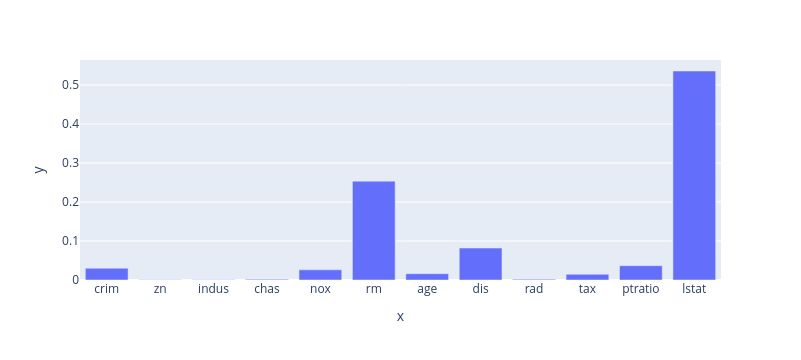

In [63]:
px.bar(x= (X.columns),y= (regressionTree.feature_importances_))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="dE3=o8T5`CCHo%,m,2(A">regressionTree</variable></variables><block type="varDoMethod" id="XntGzn~qa18Ik6_`_)X8" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">bar</field><data>px:bar</data><value name="ADD0"><block type="valueOutputCodeBlock" id="$ALMI7MUyW+_ndPYFX`6"><field name="CODE">x=</field><value name="INPUT"><block type="varGetProperty" id="]eR#Z1Q-Y.)v*wPlm%=h"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><field name="MEMBER">columns</field><data>X:columns</data></block></value></block></value><value name="ADD1"><block type="valueOutputCodeBlock" id="3YVNFcVDtd*X{0Sg{6Oc"><field name="CODE">y=</field><value name="INPUT"><block type="varGetProperty" id="@z94kf*yvYscV2]OHY$,"><field name="VAR" id="dE3=o8T5`CCHo%,m,2(A">regressionTree</field><field name="MEMBER">feature_importances_</field><data>regressionTree:feature_importances_</data></block></value></block></value></block></xml>

### Bagged regression tree

For some reason, `sklearn` does not implement `feature_importances_` for `BaggingRegressor`, so use the following freestyle for the `y=` part of your plot: 

`np.mean([ tree.feature_importances_ for tree in baggedRegressionTree.estimators_ ], axis=0)`

**You will need to change `baggedRegressionTree` to whatever you called this model above.**

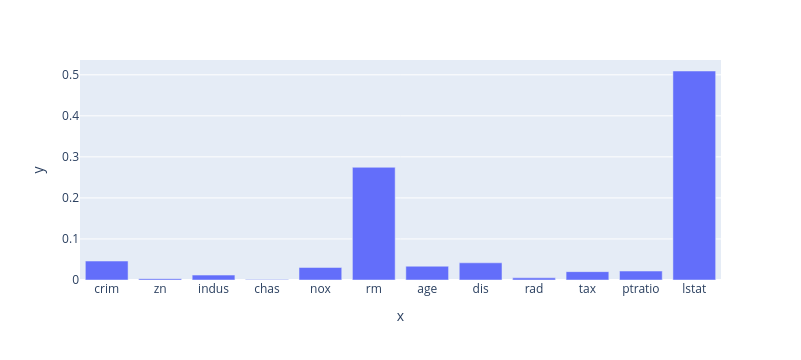

In [65]:
px.bar(x= (X.columns),y=np.mean([ tree.feature_importances_ for tree in baggedRegressionTree.estimators_ ], axis=0))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable></variables><block type="varDoMethod" id="XntGzn~qa18Ik6_`_)X8" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">bar</field><data>px:bar</data><value name="ADD0"><block type="valueOutputCodeBlock" id="$ALMI7MUyW+_ndPYFX`6"><field name="CODE">x=</field><value name="INPUT"><block type="varGetProperty" id="]eR#Z1Q-Y.)v*wPlm%=h"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><field name="MEMBER">columns</field><data>X:columns</data></block></value></block></value><value name="ADD1"><block type="valueOutputCodeBlock" id="3YVNFcVDtd*X{0Sg{6Oc"><field name="CODE">y=np.mean([ tree.feature_importances_ for tree in baggedRegressionTree.estimators_ ], axis=0)</field></block></value></block></xml>

### Random forest regression tree

This uses `feature_importances_`, so you can make the plot exactly like you would for the regression tree model.

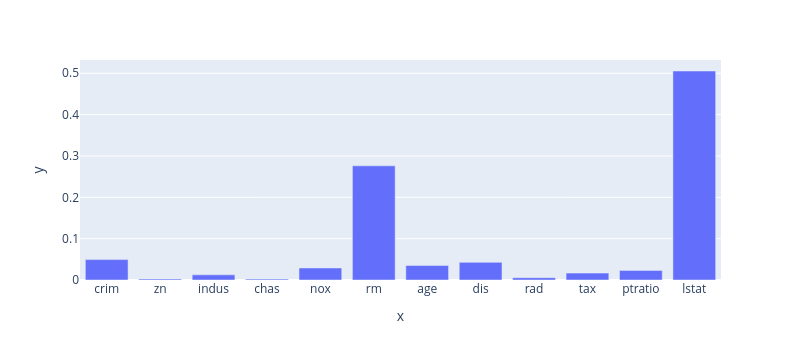

In [67]:
px.bar(x= (X.columns),y= (randomForestRegressionTree.feature_importances_))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="Mvcq+P(afE9x6R@bF+6B">randomForestRegressionTree</variable></variables><block type="varDoMethod" id="XntGzn~qa18Ik6_`_)X8" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">bar</field><data>px:bar</data><value name="ADD0"><block type="valueOutputCodeBlock" id="$ALMI7MUyW+_ndPYFX`6"><field name="CODE">x=</field><value name="INPUT"><block type="varGetProperty" id="]eR#Z1Q-Y.)v*wPlm%=h"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><field name="MEMBER">columns</field><data>X:columns</data></block></value></block></value><value name="ADD1"><block type="valueOutputCodeBlock" id="3YVNFcVDtd*X{0Sg{6Oc"><field name="CODE">y=</field><value name="INPUT"><block type="varGetProperty" id="@z94kf*yvYscV2]OHY$,"><field name="VAR" id="Mvcq+P(afE9x6R@bF+6B">randomForestRegressionTree</field><field name="MEMBER">feature_importances_</field><data>randomForestRegressionTree:feature_importances_</data></block></value></block></value></block></xml>

-----------
**QUESTION:**

Look carefully at the three feature importance plots, hovering your mouse over each bar.
What are the major differences between them?

**ANSWER: (click here to edit)**

*The rank order of importance across the variables is basically the same in the three models.
With respect to the most important features, the ensemble models decrease the importance of `lstat` and increase the importance of `rm` relative to the regression tree model.
Bagging and random forests are very similar on feature importance.*
<hr>

**QUESTION:**

What other tool(s) can you think of that we haven't tried that we could use to compare these models?

**ANSWER: (click here to edit)**

*Since these are regressions, we could plot the predictions against the actual `medv` as a scatterplot.
It would be interesting/potentially useful to know if the predictions were good across the entire range of `medv`, especially since we noticed some outlier expensive houses earlier.*

<hr>

<!--  -->